# Problem Statement and Dataset:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are two datasets in bank-additional.zip folder:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



## Problem Statement

Predict whether the client will subscribe (yes or no), a deposit variable y. In other words binary classification of client who subscribe or does not subscribe to a term deposit.

# Notebook Preparation

In [3]:
from IPython.core.debugger import Pdb as pdb
import _pickle as cPickle


import numpy as np
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set styling 

sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

In [4]:
np.random.seed(42)

# Extract and Load Data

Unarchive data

In [9]:
# Since the data is sotred in a zipped folder, need to extract the dataset

import zipfile
with zipfile.ZipFile("data/bank-additional.zip","r") as zip_file:
    zip_file.extractall("data")

In [10]:
zip_file.close()

Load File path

In [11]:
%ls -l data/bank-additional/bank-additional-full.csv

-rw-r--r-- 1 root root 5834924 Jun  8 16:58 data/bank-additional/bank-additional-full.csv


Convert csv file to pandas Dataframe

In [13]:
file = 'data/bank-additional/bank-additional-full.csv'
data = pd.read_csv(file, delimiter= ';', header =0)

# Exploratory Data Analysis

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Take a look at data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

    There are 21 columns without any null values. including target variable y. Among these 5 are numerical and rest are categorical variables. 
    

In [9]:
# DESCRIPTIVE STATISTICS for Numerical FEATURES 

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Attribute Information
Attribute Information:

Input variables:
### bank client data:
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8.  contact: contact communication type (categorical: 'cellular','telephone')
9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  previous: number of contacts performed before this campaign and for this client (numeric)
15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.  cons.price.idx: consumer price index - monthly indicator (numeric)
18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21.  y - has the client subscribed a term deposit? (binary: 'yes','no')

In [9]:
# In the data statement it has been suggested to drop the 'duration' and use it only for benchmarking purpose
data =data.drop('duration', axis=1)

## Visualization 
 General picture of the data

### Distribution of Numerical Variables

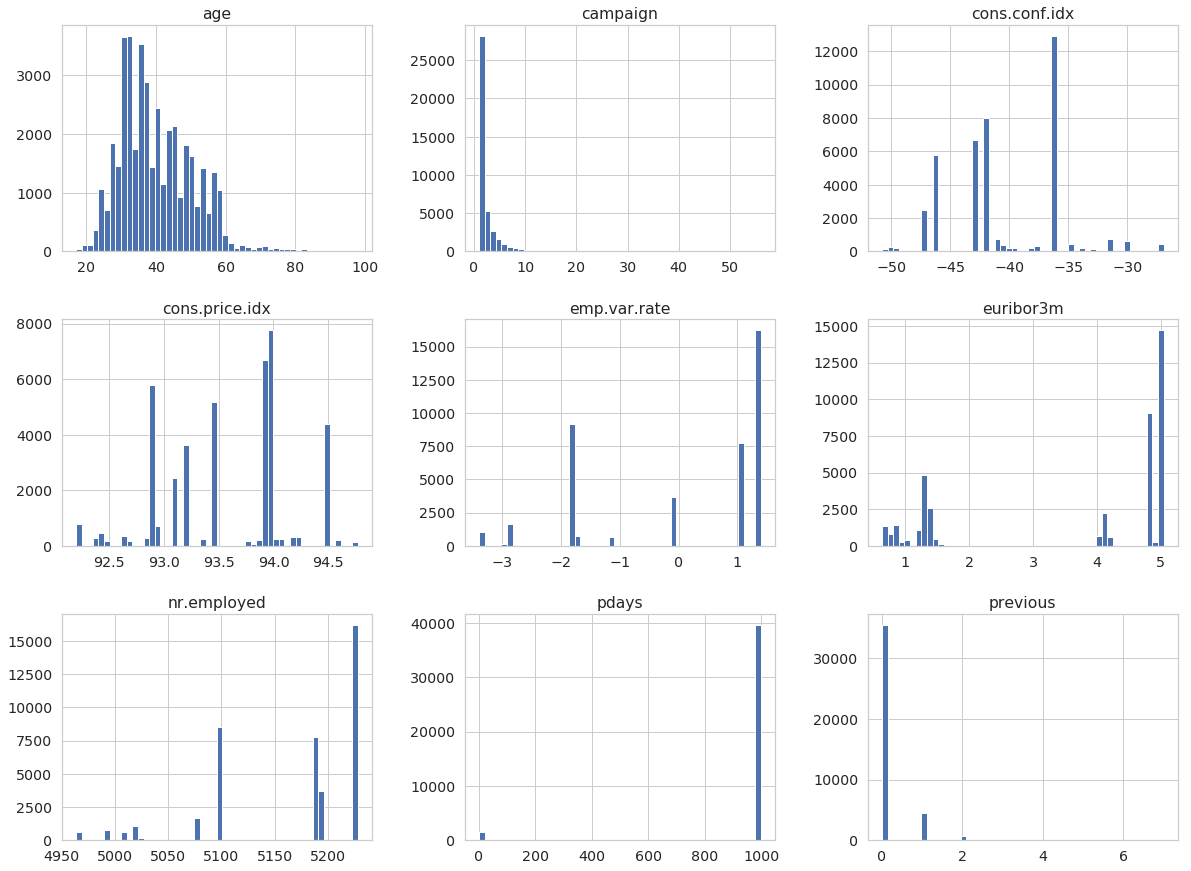

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

### Countplot of all the the categories of variables and their distribution in binary classes

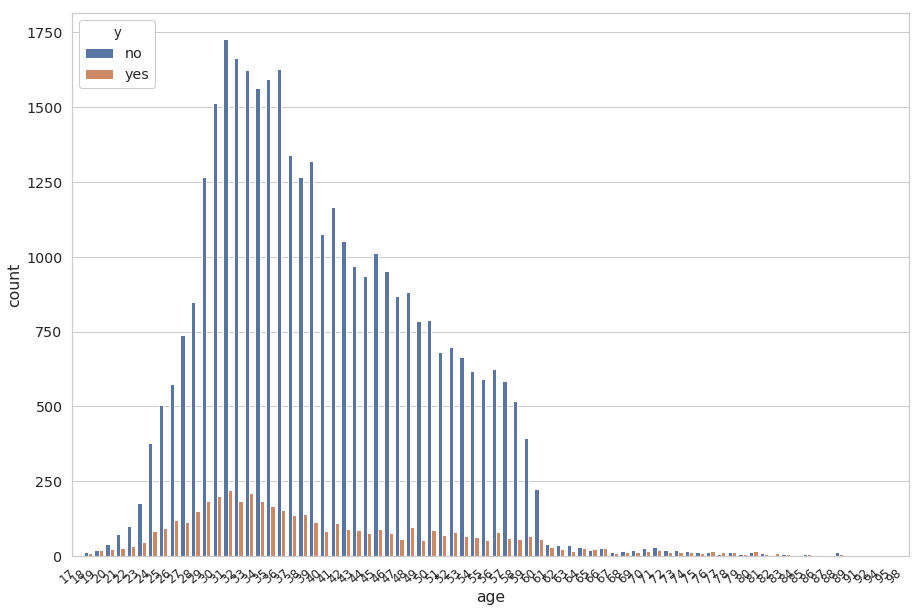

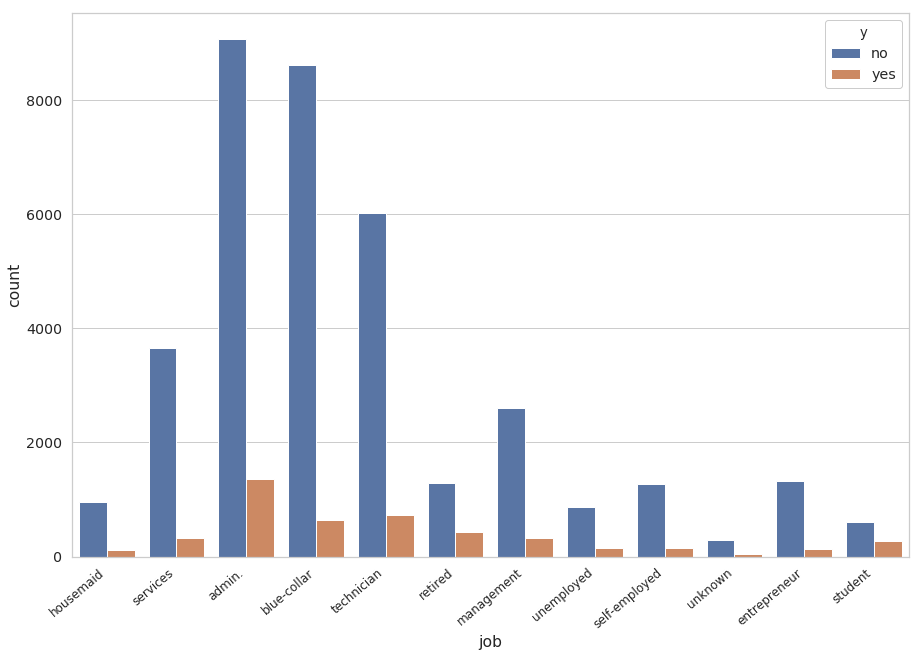

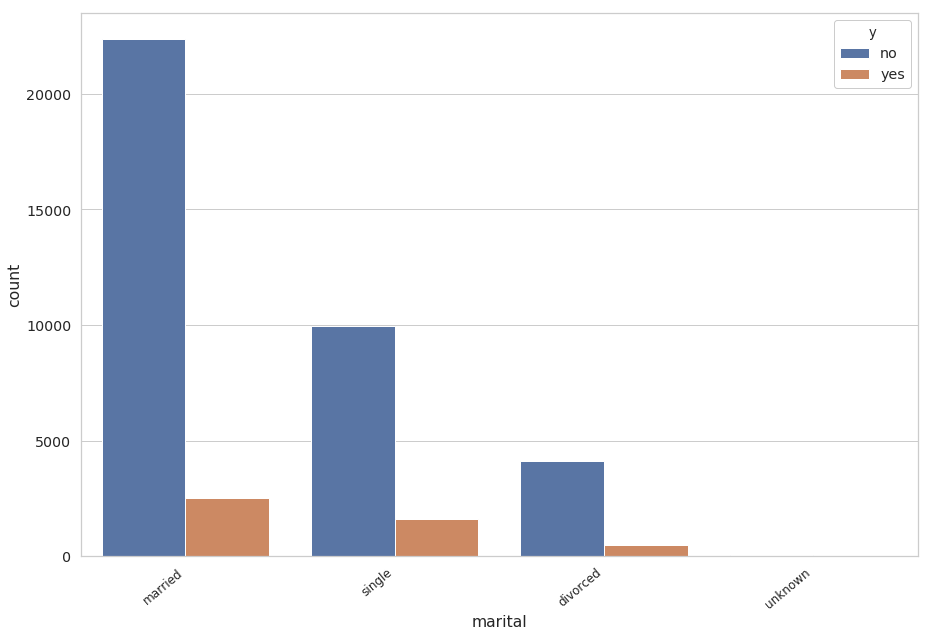

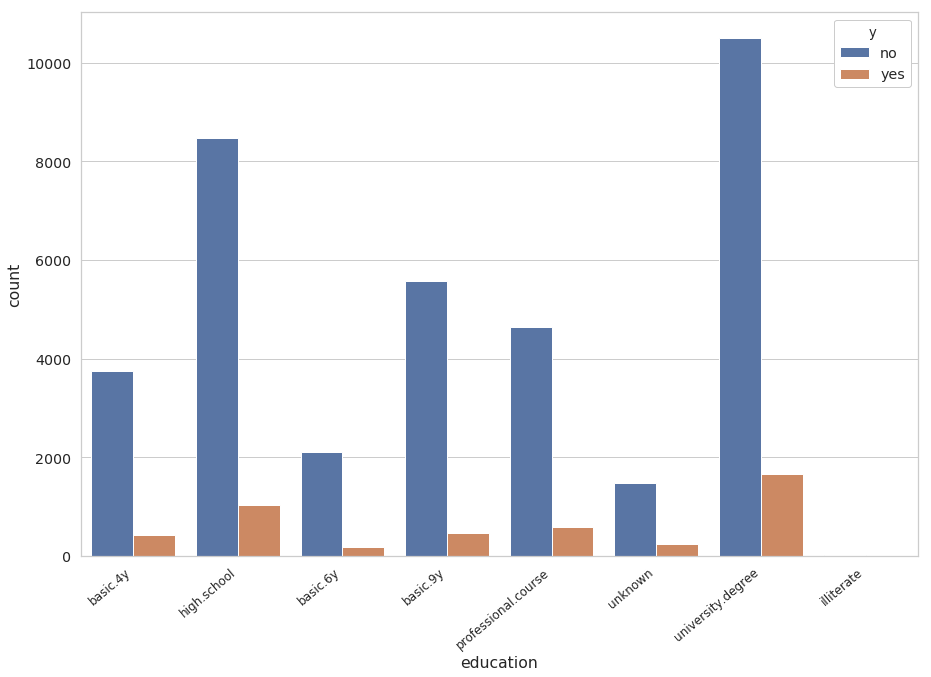

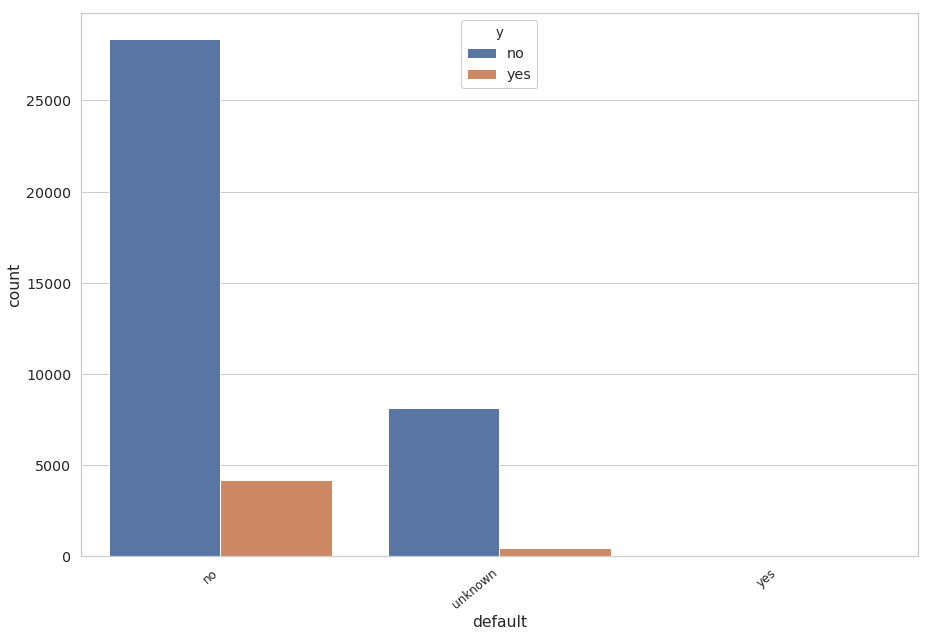

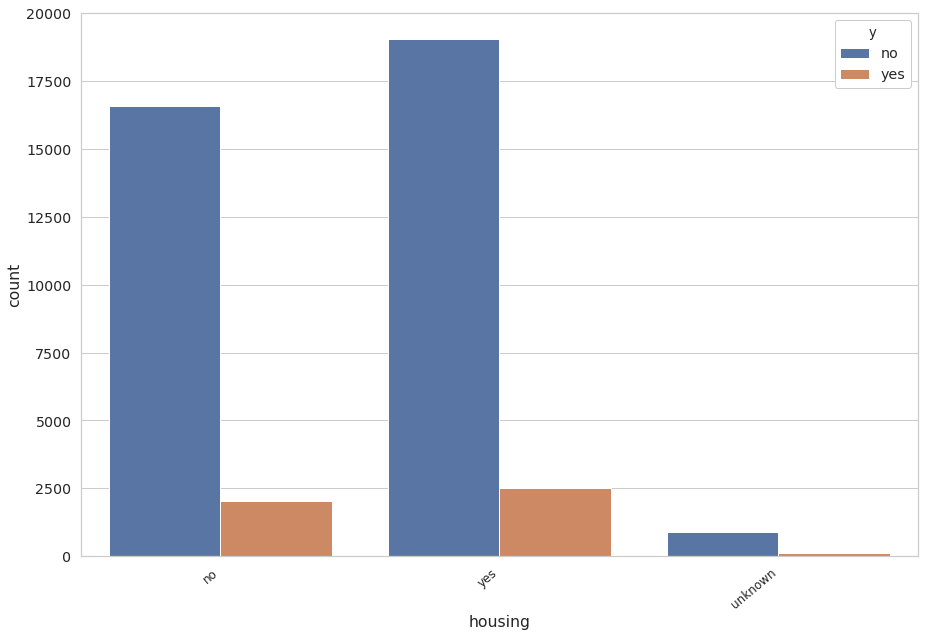

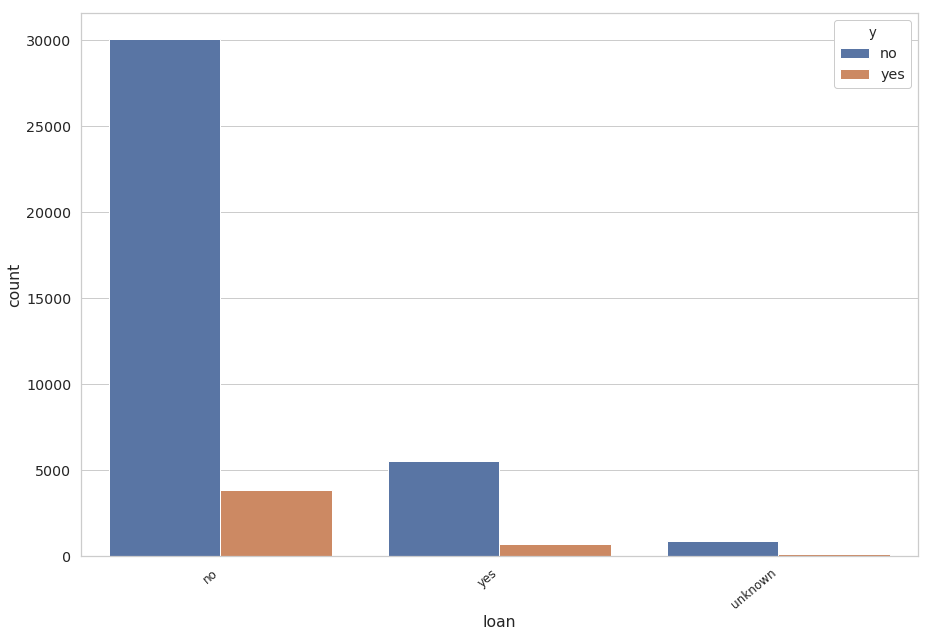

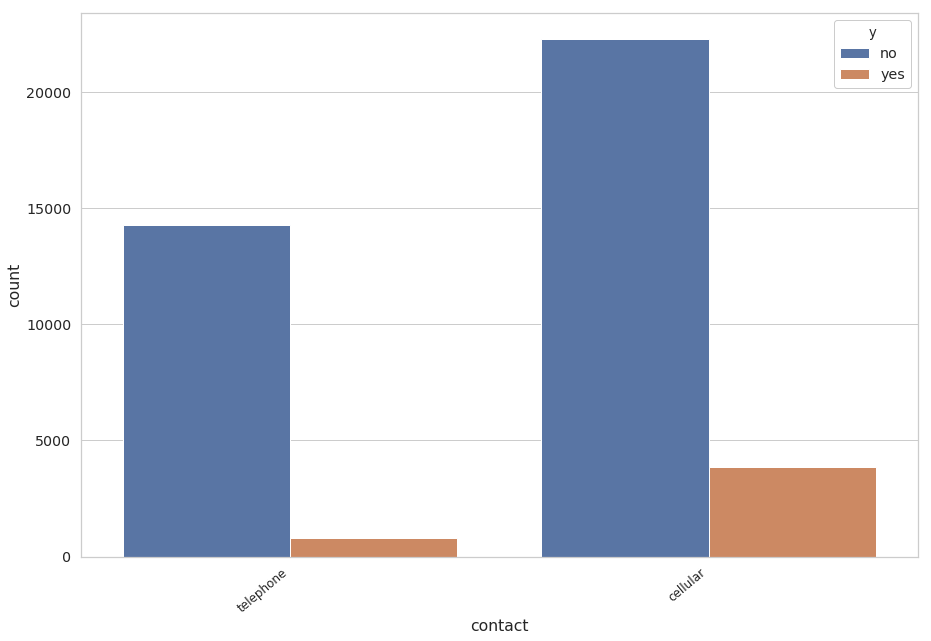

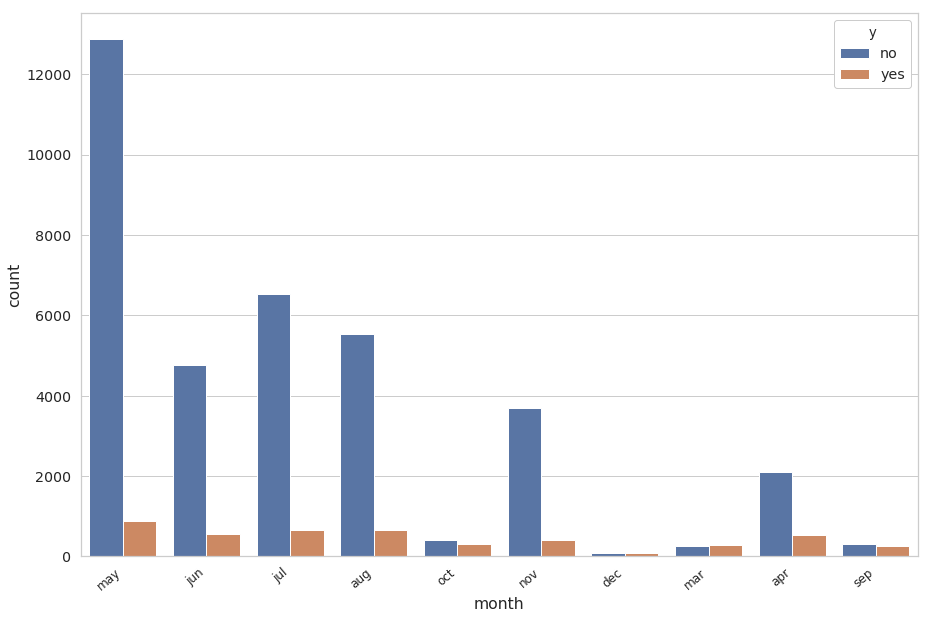

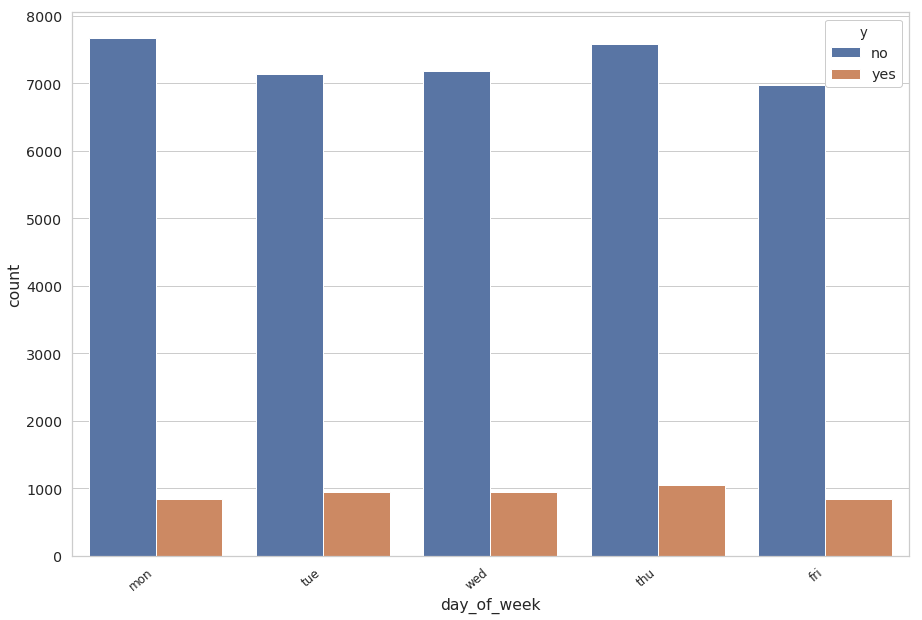

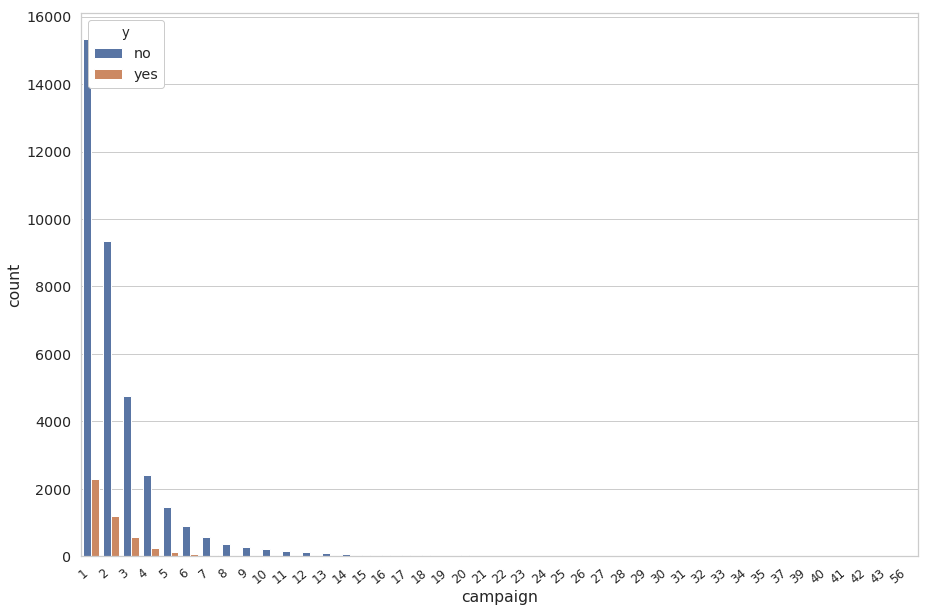

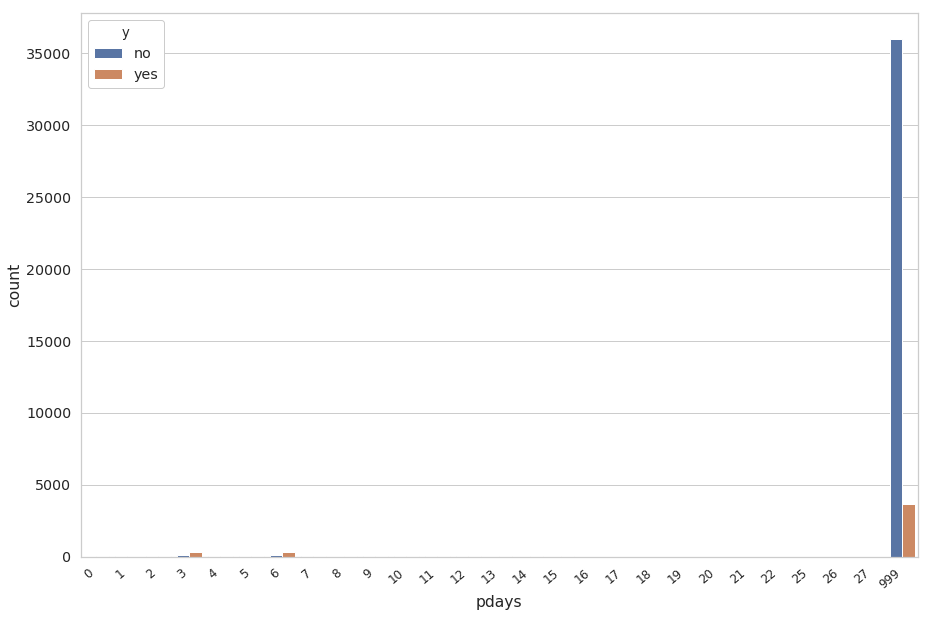

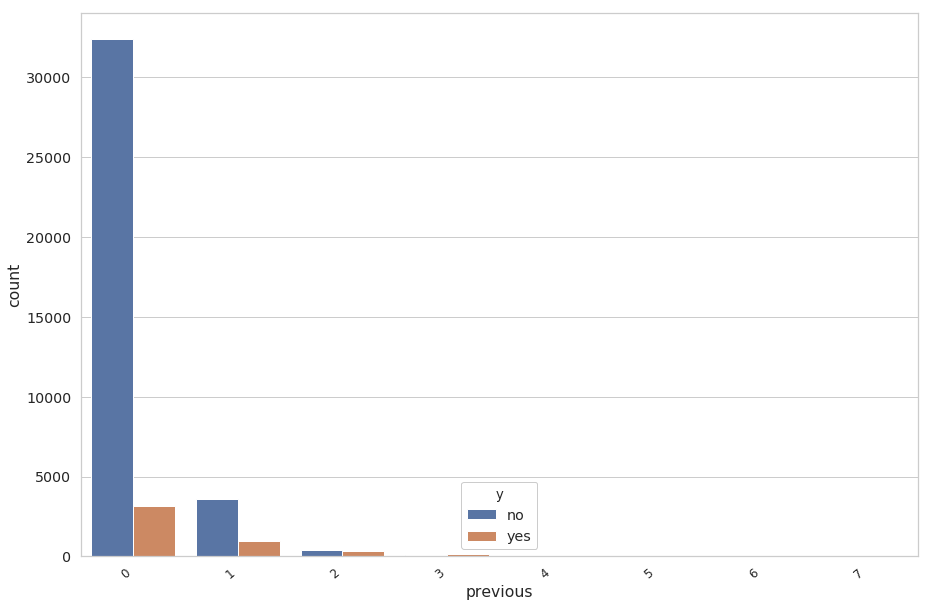

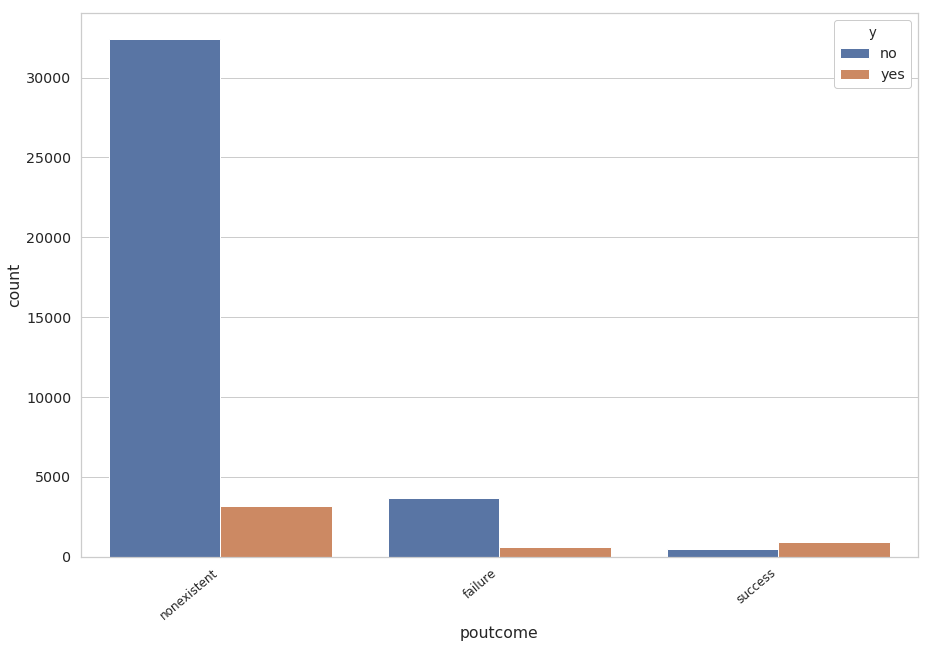

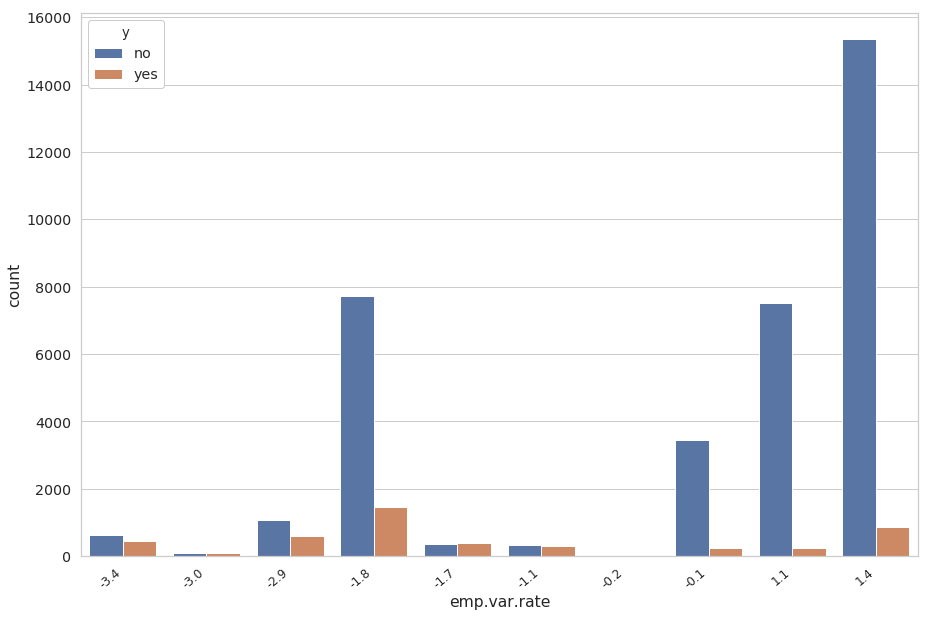

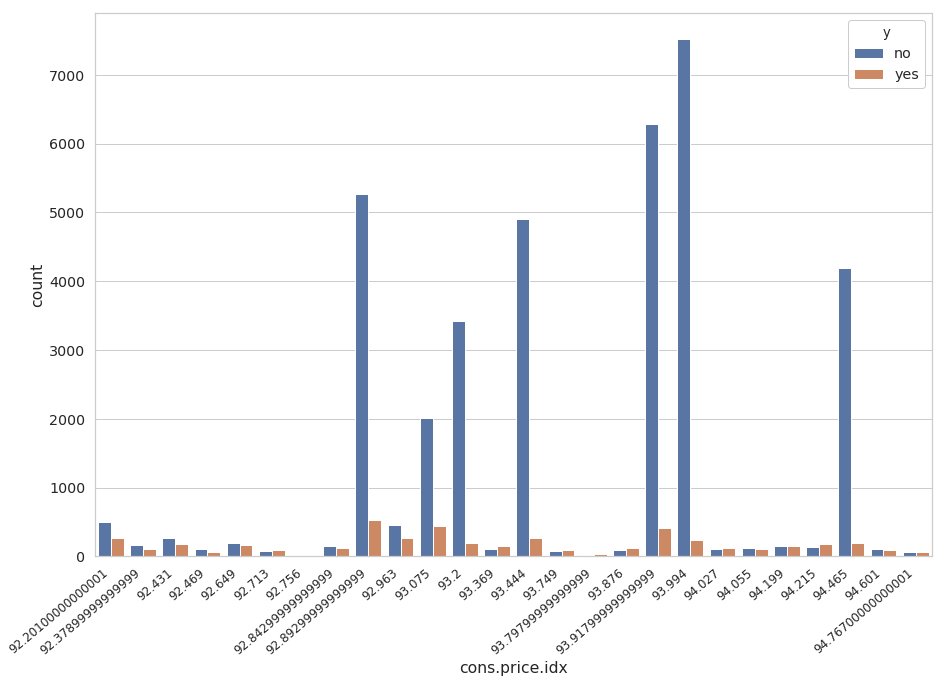

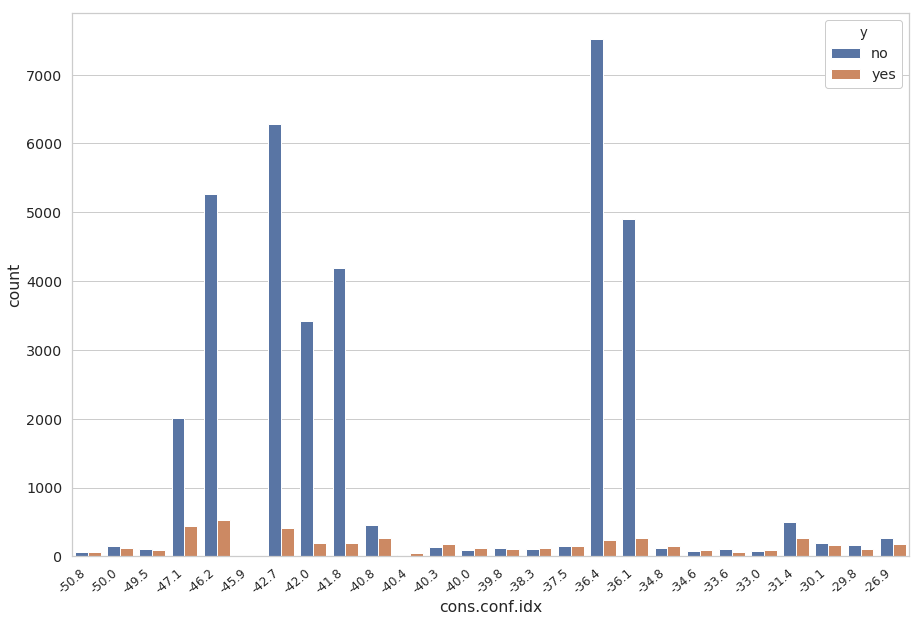

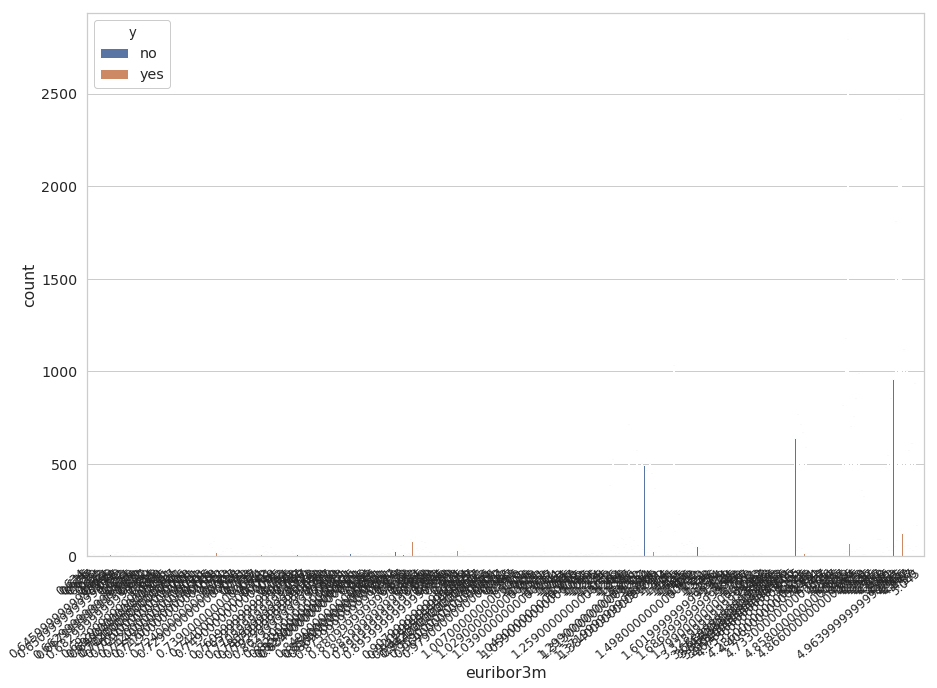

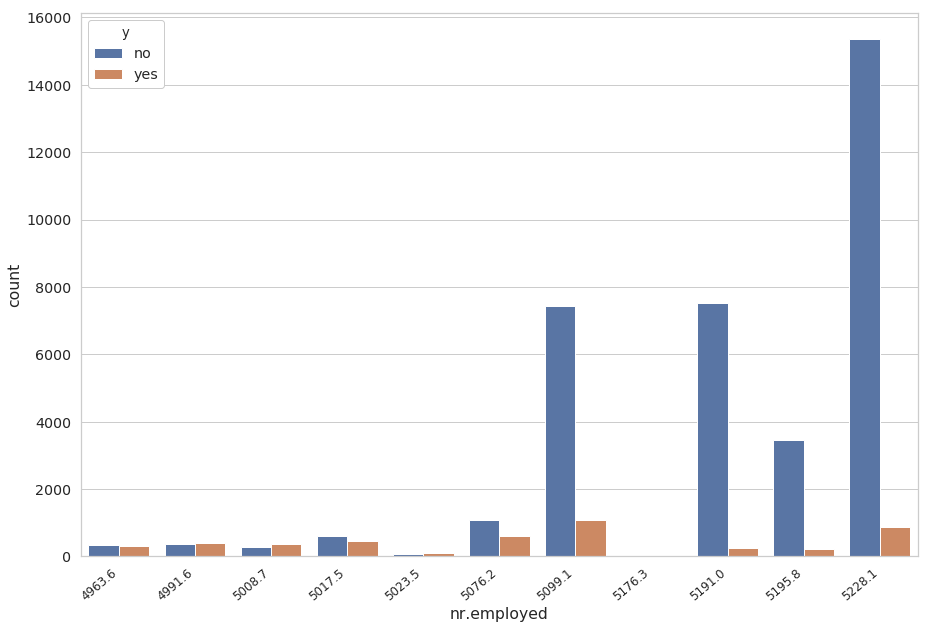

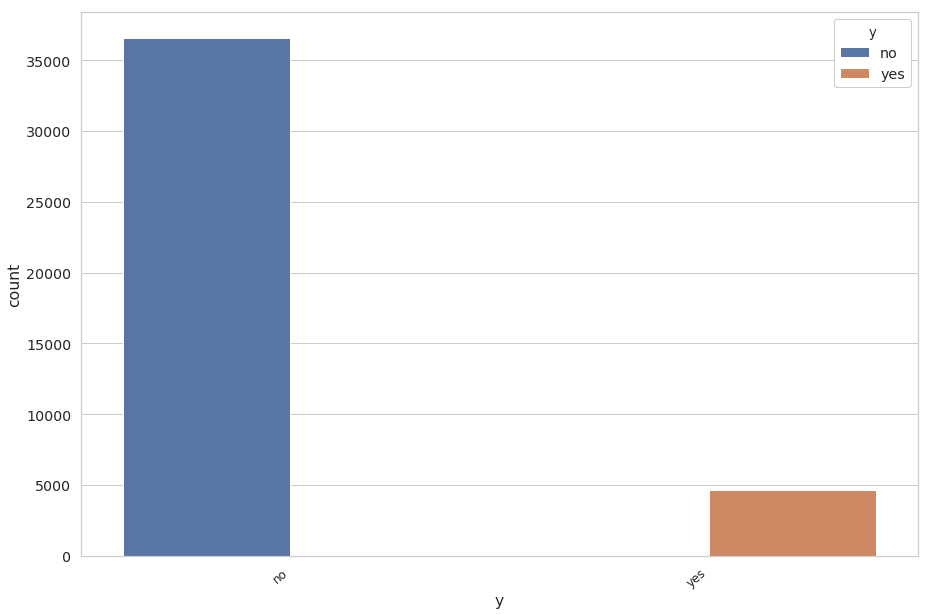

In [11]:
%matplotlib inline

def bar_plot(attribute, dataset):
    plt.figure(figsize=(15,10))
    #Y = data[column]
    #total=len(Y)*1
    #plt.subplots(3,6)
    ax=sns.countplot(x=attribute, data=dataset, hue="y")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=12, ha="right")
        
    plt.show()  
#bar_plot('housing', data)
for column in data.columns:
    bar_plot(column, data)
    plt.show()

The plots above roughly shows teh relationship between attributes and outcome variable ('y'). The count plot between y and day_of_week  show that there is no significant relationship between these two. Similarly, pdays which represents number of days passed sincce last contact and value '999' means clients are not contacted at all and this value is significantly more. So these attributes can be dropped 

The plots above shows that data is skewed and unbalanced

### Correlation among features

Text(0.5,1,'Correlation Matrix of Features')

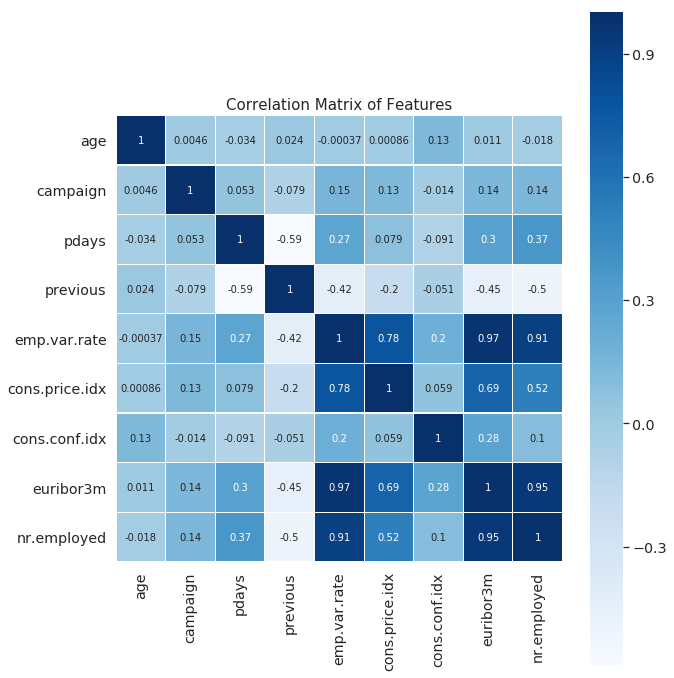

In [12]:

p_corr = data.corr()
f, ax = plt.subplots(figsize=(10,12))

ax = sns.heatmap(p_corr, cmap='Blues', square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Correlation Matrix of Features', size=15)

In [13]:
# Percentage Distributuion of target variable which is binary in nature
# normalize=True  to capture relative frequency of unique values

y_class = data.y.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'


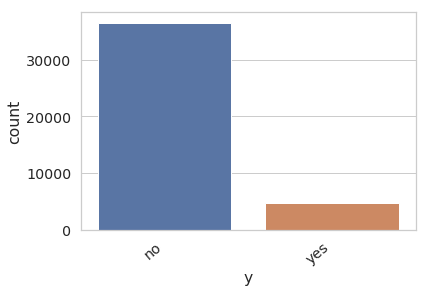

In [14]:
ax=sns.countplot('y', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        
plt.show()

In [15]:
data.y.value_counts()/len(data)

no     0.887346
yes    0.112654
Name: y, dtype: float64

# Data Preparation

In [15]:
data = data.drop('day_of_week', axis =1)

In [16]:
# Convert categorical value for y into numerical
data['y'] = data['y'].map({'no': 0,'yes': 1})

In [17]:
# Separate the target variable from the dataset

X = data.drop('y', axis =1)
Y = data['y'].copy()


In [18]:
print(X.shape, Y.shape)

(41188, 19) (41188,)


In [19]:
Y.head(3)

0    0
1    0
2    0
Name: y, dtype: int64

Data is imbalanced with target attribute y that is client subscription to a term deposit. Almost 89% with 'no' value and about 11% 'yes' value.

##  Train and Test split 

In [20]:
# Split the data into training set and test set into 8:2 rati0 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, shuffle=True, test_size=0.2 )

In [21]:
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

(32950, 19) 32950
(8238, 19) 8238


In [22]:
y_train.value_counts()/len(y_train)

0    0.887557
1    0.112443
Name: y, dtype: float64

In [23]:
y_test.value_counts()/len(y_test)

0    0.886502
1    0.113498
Name: y, dtype: float64

## One Hot Encoding

Convert categorical independent variables into numerical 

In [24]:
cat_cols =data[['job','marital', 'education', 'default', 'housing','loan','contact', 'month','poutcome']]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
    '''Function to add hot encoded features to the dataframe'''
    for i, col in enumerate(vectorizer.get_feature_names()):
        colname = name + '_'+col   
        df[colname] = sparse[:, i].toarray().ravel().tolist()
  
    return df


def OneHotEncoder(categorical_cols, X_train, X_test):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.    
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

     # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i) 

In [26]:
OneHotEncoder(cat_cols, X_train, X_test)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(cat_cols, axis=1)
#X_cv = X_cv.drop(cat_cols, axis=1)
X_test = X_test.drop(cat_cols, axis=1)

print("Shape of train: ", X_train.shape)
#print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  poutcome
Shape of train:  (32950, 58)
Shape of test:  (8238, 58)


##  Normalize features using standard scaler

In [45]:
#std_scaler= StandardScaler()
#X_train = std_scaler.fit_transform(X_train)

# Train Models

## Logistic Regression

In [27]:
logreg = LogisticRegression(class_weight='balanced' )
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
logreg_pred =logreg.predict(X_test)
print('score:' , roc_auc_score(y_test, logreg_pred).round(4))
print('accuracy:' , accuracy_score(y_test, logreg_pred).round(4))
print('cm:', confusion_matrix(y_test, logreg_pred).astype(int))



score: 0.8734
accuracy: 0.8598
cm: [[6250 1053]
 [ 102  833]]


In [30]:
logreg.score(X_train, y_train).round(3)

0.86

In [31]:
logreg.score(X_test, y_test).round(3)

0.86

##  XGBOOST

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)


In [41]:
xgb.score(X_test, y_test).round(4)

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8967

### Cross Validation


In [34]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())


/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Mean cross-validation score: 0.92


/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
test_pred = xgb.predict(X_test)

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


###  Confusion Matrix


In [39]:
accuracy = accuracy_score(y_test, test_pred)
auroc = roc_auc_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred).astype(int)

print ('accuracy:', np.round(accuracy,2))
print ('auroc:', np.round(auroc,2))
print(cm)


accuracy: 0.92
auroc: 0.74
[[7089  214]
 [ 463  472]]


# Conclusion

Overall XGBoost perfomed well with the score of 89% while the score for logistic regression is 83%

## SGD Classifier